### FAHAD HUSSAIN SADAT
### BSDSF21M014

### Loading the ICT Dataset

In [33]:

import pandas as pd

# Loading the ICT dataset
file_path = 'ICT.xlsx'

morning_data = pd.read_excel(file_path, sheet_name='ICT Morning', skiprows=1)
afternoon_data = pd.read_excel(file_path, sheet_name='ICT Afternoon', skiprows=1)

morning_data = morning_data[1:].reset_index(drop=True)
afternoon_data = afternoon_data[1:].reset_index(drop=True)

morning_data_cleaned = morning_data.iloc[:, 3:]  # Assuming the first 3 columns (Sr#., Roll No., Name) are to be dropped
afternoon_data_cleaned = afternoon_data.iloc[:, 3:]
    

In [35]:
morning_data_cleaned.columns

Index(['Q1', 'Q2', 'A1', 'Q3', 'Q4', 'Midterm', 'Q5', 'A2', 'Q6', 'Q7', 'Q8',
       'Final', 'Total'],
      dtype='object')

### Applying Weightage and Normalization

In [36]:

def apply_weightage(data, weights, max_marks):
    for col, weight in weights.items():
        if col in data.columns:
            #data[col] = pd.to_numeric(data[col], errors='coerce') 
            data[col] = (data[col] / max_marks[col]) * weight  
    
    data = data.fillna(0)
    return data

# ICT-specific weights and max marks
weights = {
    'Q1': 2.625, 'Q2': 2.625, 'A1': 2, 'Q3': 2.625, 'Q4': 2.625,
    'Midterm': 35, 'Q5': 2.625, 'A2': 2, 'Q6': 2.625, 'Q7': 2.625,
    'Q8': 2.625, 'Final': 40
}
max_marks = {
    'Q1': 30, 'Q2': 49, 'A1': 100, 'Q3': 30, 'Q4': 15,
    'Midterm': 35, 'Q5': 45, 'A2': 100, 'Q6': 32, 'Q7': 24,
    'Q8': 40, 'Final': 100
}

morning_data_weighted = apply_weightage(morning_data_cleaned, weights, max_marks)
afternoon_data_weighted = apply_weightage(afternoon_data_cleaned, weights, max_marks)

print("Normalized Morning Data:")
print(morning_data_weighted.head())

print("\nNormalized Afternoon Data:")
print(afternoon_data_weighted.head())
    

Normalized Morning Data:
       Q1        Q2   A1       Q3      Q4  Midterm        Q5   A2        Q6  \
0  2.1000  1.366071  2.0  2.27500  1.1375    26.25  1.370833  2.0  1.230469   
1  2.3625  1.848214  2.0  2.53750  1.2250    31.50  2.158333  2.0  2.132812   
2  2.1875  1.232143  2.0  2.45000  0.7875    23.63  2.041667  2.0  1.476562   
3  2.1875  1.741071  2.0  1.96875  1.0500    24.06  1.079167  2.0  1.066406   
4  2.5375  1.875000  2.0  2.10000  1.4875    24.50  0.000000  2.0  1.599609   

         Q7        Q8   Final  Total  
0  0.984375  1.640625  12.000    0.0  
1  1.312500  2.165625  13.600    0.0  
2  1.203125  1.706250  11.468    0.0  
3  1.203125  1.640625  12.532    0.0  
4  1.093750  2.165625  12.932    0.0  

Normalized Afternoon Data:
       Q1        Q2   A1       Q3     Q4  Midterm        Q5    A2        Q6  \
0  2.6250  2.089286  1.8  1.18125  1.225    31.06  2.100000  1.88  2.173828   
1  2.3625  0.000000  0.0  0.00000  0.000     0.00  0.000000  0.00  0.000000   
2

### Splitting Features and Target

In [37]:

X_train = morning_data_weighted.drop(columns=['Final'])
y_train = morning_data_weighted['Final']

X_test = afternoon_data_weighted.drop(columns=['Final'])
y_test = afternoon_data_weighted['Final']

print(f"Training Features Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Testing Target Shape: {y_test.shape}")
    

Training Features Shape: (53, 12)
Training Target Shape: (53,)
Testing Features Shape: (44, 12)
Testing Target Shape: (44,)


In [32]:
afternoon_data_cleaned.columns

Index([30, 49, 100, '30.1', 15, 35, 45, '100.1', 32, 24, 40, '40.1', '100.2'], dtype='object')

### Training Models for Activities 5 to 13

In [39]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import numpy as np
results = []

# Train models for activities from 5 to 13
for n in range(5, X_train.shape[1] + 1):
    print(f"\nTraining model with the first {n} activities...")
    
    X_train_n = X_train.iloc[:, :n]
    X_test_n = X_test.iloc[:, :n]
    
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train_n, y_train)
    
    with open(f"ict_model_{n}_activities.pkl", "wb") as file:
        pickle.dump(model, file)
    
    y_pred = model.predict(X_test_n)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Activities': n, 'RMSE': rmse, 'R2': r2})
    
    print(f"Activities: {n}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df)
    


Training model with the first 5 activities...
Activities: 5, RMSE: 2.8513, R2: 0.0594

Training model with the first 6 activities...
Activities: 6, RMSE: 2.5062, R2: 0.2733

Training model with the first 7 activities...
Activities: 7, RMSE: 2.8788, R2: 0.0412

Training model with the first 8 activities...
Activities: 8, RMSE: 2.6552, R2: 0.1843

Training model with the first 9 activities...
Activities: 9, RMSE: 2.5000, R2: 0.2769

Training model with the first 10 activities...
Activities: 10, RMSE: 2.5274, R2: 0.2610

Training model with the first 11 activities...
Activities: 11, RMSE: 2.3390, R2: 0.3670

Training model with the first 12 activities...
Activities: 12, RMSE: 2.3168, R2: 0.3790

Model Performance:
   Activities      RMSE        R2
0           5  2.851318  0.059385
1           6  2.506195  0.273308
2           7  2.878822  0.041151
3           8  2.655227  0.184312
4           9  2.500046  0.276870
5          10  2.527413  0.260951
6          11  2.338999  0.367033
7     

### Visualizing Results

Activities: 5, RMSE: 2.8513
Activities: 6, RMSE: 2.5062
Activities: 7, RMSE: 2.8788
Activities: 8, RMSE: 2.6552
Activities: 9, RMSE: 2.5000
Activities: 10, RMSE: 2.5274
Activities: 11, RMSE: 2.3390
Activities: 12, RMSE: 2.3168
Model for 13 activities not found. Skipping.


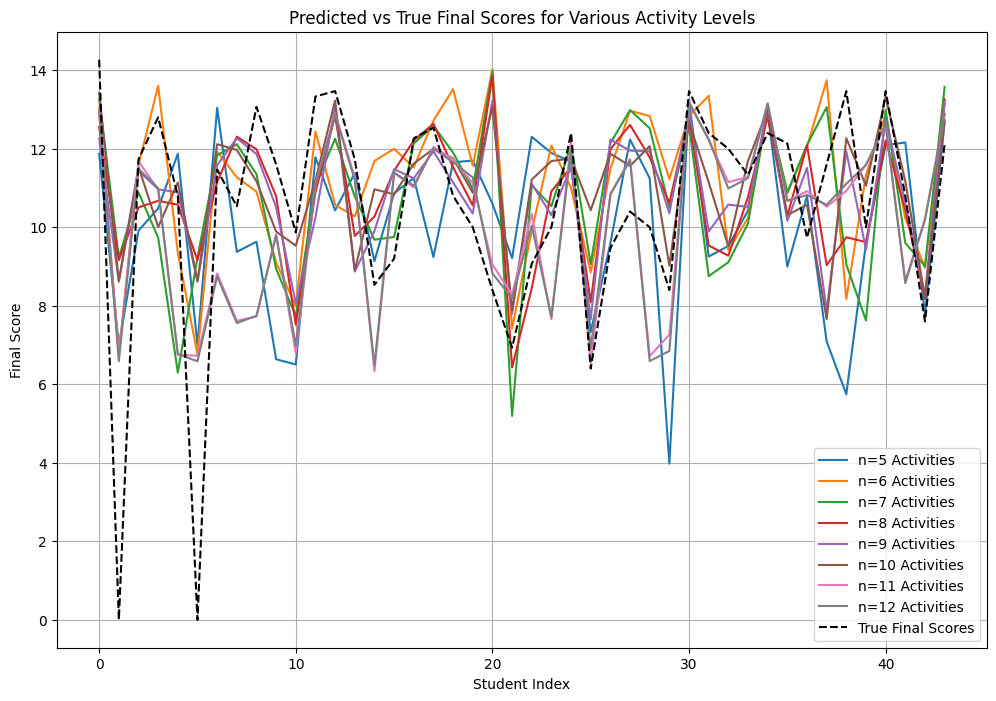

In [41]:
import matplotlib.pyplot as plt
predictions = []

# Loop over activity numbers from 5 to 13
for n in range(5, 14):
    try:
        X_test_n = X_test.iloc[:, :n]

        with open(f"ict_model_{n}_activities.pkl", "rb") as file:
            model = pickle.load(file)

        y_pred = model.predict(X_test_n)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Store the predictions and RMSE
        predictions.append({'Activities': n, 'RMSE': rmse, 'Predictions': y_pred})

        print(f"Activities: {n}, RMSE: {rmse:.4f}")

    except FileNotFoundError:
        print(f"Model for {n} activities not found. Skipping.")

# Visualize predictions for each student and number of activities
plt.figure(figsize=(12, 8))
for result in predictions:
    n = result['Activities']
    plt.plot(range(len(y_test)), result['Predictions'], label=f'n={n} Activities')

plt.plot(range(len(y_test)), y_test, 'k--', label='True Final Scores')

plt.xlabel('Student Index')
plt.ylabel('Final Score')
plt.title('Predicted vs True Final Scores for Various Activity Levels')
plt.legend()
plt.grid(True)
plt.show()
    